In [1]:
# Goal: Investigate the sensitivity of the NLTE departure coefficient
import sys, os
import warnings
warnings.filterwarnings("ignore", module="dynesty.sampling")
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import astropy.constants as aconst
import astropy.units as u
from dynesty import plotting as dyplot
from dynesty import utils as dyfunc
import astropy.table as table
from astropy.cosmology import Planck15 as cosmology

try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.dataloader as dataloader
import snelib19odp.const as const
import snelib19odp.analysis.oxygen as oxygen
import snelib19odp.blackbody as blackbody
import snelib19odp.specds as specds

In [2]:
sds = specds.load_dataset('SN2019odp')

In [3]:
def run_fit(obj, nlte_departure_max, nlive_points):
    if obj == 'keck_early':
        spec = sds['ZTF19abqwtfu_20200124_Keck1_v1']
    elif obj == 'keck_late':
        spec = sds['ZTF19abqwtfu_20200821_Keck1_v1']
    elif obj == 'not_late':
        spec = sds['ZTF19abqwtfu_20200113_NOT_v1']
    spec = spec[~np.isnan(spec['flux'])]
    
    if obj in ['keck_early']:
        cfg = oxygen.FitSetup(spec=spec, smp=1, start5577=5400, stop5577=5650, start6300_6364=6100, stop6300_6364=6540, extra_lines=np.array([5500, 6158, 6230, 6454]), max_width=27, nlte_mode=1, max_continuum=0.5e-15, scale_factor=np.sqrt(2)/7.002413899090286e-18, nlte_departure_max=nlte_departure_max,  max_extra_line_amp=3e-14)
    elif obj == 'not_late':
        cfg = oxygen.FitSetup(spec=spec, smp=1, start5577=5400, stop5577=5650, start6300_6364=6100, stop6300_6364=6540, extra_lines=np.array([5500, 6158, 6230, 6454]), max_width=27, nlte_mode=1, max_continuum=0.5e-15, scale_factor=np.sqrt(2)/9.395640563324519e-18, nlte_departure_max=nlte_departure_max)
    # For the late Keck spectrum:
    elif obj == 'keck_late':
        cfg = oxygen.FitSetup(spec=spec, smp=1, start5577=5520, stop5577=5669, start6300_6364=6150, stop6300_6364=6450, extra_lines=np.array([6225]), max_width=22, nlte_mode=1, max_continuum=0.5e-15, scale_factor=np.sqrt(2)/3.031557125203086e-18, nlte_departure_max=nlte_departure_max)
    
    return oxygen.run_dynesty_fit(cfg, nlive_init=nlive_points, dynesty_method='rwalk', return_sampler=True)

In [4]:
data = {}

In [5]:
obj = 'keck_early'
nlte_deps = [0.01, 0.05, 0.1, 0.25, 0.5, 0.99]
nlive_points = 4000
nlive_batch = 8000
for nlte_departure_max in nlte_deps:
    if (obj, nlte_departure_max) in data:
        continue
    results, samples, sampler = run_fit(obj, nlte_departure_max, nlive_points)
    sampler.add_batch(nlive=nlive_batch)
    data[(obj, nlte_departure_max)] = {'results': results, 'samples': samples, 'sampler': sampler}

272393it [48:27, 93.67it/s, batch: 0 | bound: 582 | nc: 1 | ncall: 14063877 | eff(%):  1.937 | loglstar:   -inf < -831.524 <    inf | logz: -894.011 +/-  0.166 | dlogz:  0.000 >  0.010]    
0it [00:00, ?it/s]

	Mean: array([ 2.90867074e+00,  5.52847619e+03,  2.69468718e+01,  1.68898634e+01,
        1.69407836e+01,  7.58171968e-03, -4.88596792e-03,  1.98163405e+26,
       -4.78820963e+00,  2.43732230e+00, -2.40262680e+00,  2.13327467e-01,
        5.75280531e+00,  5.47149802e+00,  7.62520705e+00,  6.55047885e+00])
	Cov: array([[ 2.45240186e+00, -1.38015185e+03,  3.05700325e-03,
		        -2.65670162e-02, -1.70073138e-02,  1.93782045e-04,
		        -4.75489080e-07,  4.45021095e+21, -9.45142060e-03,
		         4.93081505e-03, -1.80343067e-03,  1.99996743e-01,
		         2.75516308e-03,  2.36536003e-05,  1.83959438e-04,
		         4.66295170e-04],
		       [-1.38015185e+03,  9.74609535e+05, -1.79512505e+00,
		         2.03239930e+01,  5.59513324e+00, -1.62235994e-01,
		         2.01658044e-03, -2.02674799e+24,  3.89999806e+00,
		         7.46385435e+00,  1.80536155e+00, -1.11791824e+02,
		        -1.31211879e+00,  2.93731867e-01,  5.02524023e-02,
		         3.73532023e-01],
		       [ 3.05700325e

312814it [07:25, 701.91it/s, batch: 1 | bound: 650 | nc: 50 | ncall: 16084927 | eff(%):  1.945 | loglstar: -841.168 < -833.291 < -837.200 | logz: -894.011 +/-  0.166 | stop:    nan]   
272675it [45:49, 99.18it/s, batch: 0 | bound: 570 | nc: 1 | ncall: 13855103 | eff(%):  1.968 | loglstar:   -inf < -831.491 <    inf | logz: -894.048 +/-  0.166 | dlogz:  0.000 >  0.010]    
0it [00:00, ?it/s]

	Mean: array([ 3.07311538e+00,  5.29847365e+03,  2.69467071e+01,  1.68947019e+01,
        1.69349375e+01,  7.61880679e-03, -4.88158088e-03,  1.98153279e+26,
       -4.78704349e+00,  2.43746152e+00, -2.40289079e+00,  2.24497156e-01,
        5.75771442e+00,  5.47266500e+00,  7.62388944e+00,  6.54969431e+00])
	Cov: array([[ 1.90995503e+00, -8.37977995e+02,  7.00920847e-04,
		         7.90914163e-03,  1.01028840e-03, -6.88244959e-05,
		        -2.74127210e-06,  1.68242614e+21, -3.47349882e-03,
		         4.64147323e-03,  1.22394986e-03,  1.56371082e-01,
		         2.57644976e-03, -1.40309014e-03,  6.16543065e-04,
		        -1.30567677e-03],
		       [-8.37977995e+02,  4.18833849e+05, -6.60528607e-02,
		        -5.51548026e+00, -4.10624919e+00,  3.91088887e-02,
		         1.17277852e-03, -1.16117548e+24,  2.09603353e+00,
		         6.76823261e+00, -7.15273145e-01, -6.91051649e+01,
		        -9.56204958e-01,  1.94802128e+00, -3.65349820e-01,
		         9.39165348e-01],
		       [ 7.00920847e

312679it [07:20, 709.60it/s, batch: 1 | bound: 634 | nc: 50 | ncall: 15855303 | eff(%):  1.972 | loglstar: -841.565 < -833.346 < -837.512 | logz: -894.048 +/-  0.166 | stop:    nan]   
271175it [46:57, 96.23it/s, batch: 0 | bound: 543 | nc: 1 | ncall: 13492600 | eff(%):  2.010 | loglstar:   -inf < -831.628 <    inf | logz: -893.810 +/-  0.165 | dlogz:  0.000 >  0.010]    
0it [00:00, ?it/s]

	Mean: array([ 3.60114657e+00,  5.01963937e+03,  2.69480128e+01,  1.68855320e+01,
        1.69387019e+01,  7.59140242e-03, -4.88286209e-03,  1.98155809e+26,
       -4.78697092e+00,  2.44135475e+00, -2.40421028e+00,  2.67311278e-01,
        5.75943326e+00,  5.47150828e+00,  7.62450808e+00,  6.54949295e+00])
	Cov: array([[ 1.51132221e+00, -4.90753672e+02,  3.12520608e-04,
		        -1.31149773e-03, -1.13468799e-02, -1.72966950e-05,
		        -9.94077595e-07,  1.58129433e+21, -3.21345109e-03,
		         1.24111558e-02,  8.69181182e-05,  1.25412884e-01,
		         1.00032425e-03,  6.60239285e-03, -1.60609498e-04,
		         1.20887793e-03],
		       [-4.90753672e+02,  1.72070279e+05, -8.26750538e-02,
		        -8.55663203e-01, -8.10105060e-01,  7.80628374e-03,
		        -6.13268919e-05, -7.75593275e+23,  1.95164709e+00,
		         4.85400755e+00, -7.16139500e-02, -4.18926722e+01,
		        -1.45090234e-01, -8.35497378e-01,  3.03332828e-01,
		         1.07112948e-01],
		       [ 3.12520608e

310971it [07:17, 711.55it/s, batch: 1 | bound: 601 | nc: 50 | ncall: 15482400 | eff(%):  2.009 | loglstar: -841.484 < -832.966 < -837.452 | logz: -893.810 +/-  0.165 | stop:    nan]  
274197it [48:57, 93.34it/s, batch: 0 | bound: 549 | nc: 1 | ncall: 13428911 | eff(%):  2.042 | loglstar:   -inf < -831.388 <    inf | logz: -894.327 +/-  0.166 | dlogz:  0.000 >  0.010]    
0it [00:00, ?it/s]

	Mean: array([ 4.67789139e+00,  4.66736930e+03,  2.69464702e+01,  1.68773863e+01,
        1.69413365e+01,  7.53930147e-03, -4.88183155e-03,  1.98156222e+26,
       -4.78986565e+00,  2.41640415e+00, -2.40368786e+00,  3.62608210e-01,
        5.76194067e+00,  5.47156451e+00,  7.62423710e+00,  6.54901617e+00])
	Cov: array([[ 5.44007370e-01, -1.07084995e+02,  1.73485333e-04,
		         2.10207962e-02, -1.53484237e-02, -5.81975704e-05,
		        -1.71041438e-07,  5.82601010e+20,  4.44377054e-03,
		         2.88280186e-02,  5.63339504e-04,  4.12799449e-02,
		        -2.95882567e-03,  4.46453389e-03,  7.03781480e-04,
		         1.32479452e-03],
		       [-1.07084995e+02,  2.32915352e+04, -2.18506948e-02,
		        -5.12511484e+00, -8.07616952e-01,  1.34205877e-02,
		        -3.34881657e-05, -2.22089379e+22, -6.46035901e-02,
		         2.00384533e+00, -9.50237824e-02, -9.70632804e+00,
		         7.54937738e-01,  2.90967367e-01,  6.83689970e-02,
		         9.63657468e-02],
		       [ 1.73485333e

317036it [07:28, 706.95it/s, batch: 1 | bound: 606 | nc: 50 | ncall: 15570861 | eff(%):  2.036 | loglstar: -841.802 < -833.181 < -837.442 | logz: -894.327 +/-  0.166 | stop:    nan]  
282505it [49:34, 94.99it/s, batch: 0 | bound: 561 | nc: 1 | ncall: 13720864 | eff(%):  2.059 | loglstar:   -inf < -831.937 <    inf | logz: -896.952 +/-  0.169 | dlogz:  0.000 >  0.010]    
0it [00:00, ?it/s]

	Mean: array([ 5.66356540e+00,  4.42301473e+03,  2.69468574e+01,  1.67240912e+01,
        1.70634247e+01,  7.90087743e-03, -4.87910592e-03,  1.98153763e+26,
       -4.81194856e+00,  2.19774578e+00, -2.40311132e+00,  5.36040197e-01,
        5.78903408e+00,  5.43311347e+00,  7.61792402e+00,  6.53774357e+00])
	Cov: array([[ 6.57961606e-02, -6.72611288e+00, -2.78878167e-05,
		         8.88027160e-03, -9.29053649e-03, -1.49961277e-05,
		        -3.58057561e-07,  1.89018712e+20,  5.85898240e-04,
		         1.37827445e-02, -2.96087512e-04,  1.26121378e-03,
		        -1.67084358e-03,  3.08847296e-03,  4.58374630e-04,
		         9.66112651e-04],
		       [-6.72611288e+00,  1.42380293e+03,  3.50725587e-02,
		        -3.92648417e+00, -7.47956016e-01,  7.88731389e-03,
		         9.18764637e-06,  7.18107192e+22,  1.68420020e-01,
		         1.52893846e+00, -1.27213663e-03, -6.17829981e-01,
		         7.23683814e-01,  1.99363650e-01,  4.53992101e-02,
		         6.23671548e-02],
		       [-2.78878167e

323420it [07:35, 709.40it/s, batch: 1 | bound: 624 | nc: 50 | ncall: 15766614 | eff(%):  2.051 | loglstar: -842.462 < -833.787 < -838.226 | logz: -896.952 +/-  0.169 | stop:    nan]   
282653it [50:08, 93.96it/s, batch: 0 | bound: 566 | nc: 1 | ncall: 13646858 | eff(%):  2.071 | loglstar:   -inf < -850.025 <    inf | logz: -915.077 +/-  0.168 | dlogz:  0.000 >  0.010]    
0it [00:00, ?it/s]

	Mean: array([ 5.89255322e+00,  4.21531617e+03,  2.69457705e+01,  1.62737949e+01,
        1.75845402e+01,  8.56049977e-03, -4.86720811e-03,  1.98149643e+26,
       -4.84639796e+00,  1.53686797e+00, -2.35829672e+00,  9.94596447e-01,
        5.86895428e+00,  5.24340702e+00,  7.59169886e+00,  6.47857564e+00])
	Cov: array([[ 8.83455460e-03, -6.66209864e-01,  6.16183582e-05,
		         1.13186038e-03, -1.83641125e-03, -1.22331784e-06,
		        -1.80062430e-07, -4.43195158e+19, -1.51817709e-04,
		         1.87991197e-03, -2.25901678e-04,  3.86924497e-06,
		        -1.12339542e-04,  8.45556595e-04,  9.33316365e-05,
		         2.07630386e-04],
		       [-6.66209864e-01,  3.84102694e+02,  2.43750880e-02,
		        -2.98690144e+00, -9.25924077e-01,  3.77488915e-03,
		        -4.99253427e-06,  4.26079089e+22,  1.09477476e-01,
		         1.15906403e+00, -1.54183707e-02, -2.79874681e-03,
		         5.36928327e-01,  3.35595283e-01,  4.58285749e-02,
		         1.04252537e-01],
		       [ 6.16183582e

322392it [07:39, 702.02it/s, batch: 1 | bound: 630 | nc: 50 | ncall: 15633808 | eff(%):  2.062 | loglstar: -860.816 < -852.340 < -856.806 | logz: -915.077 +/-  0.168 | stop:    nan]   


In [6]:
sampler.add_batch(nlive=5000)

300348it [00:54, 5494.78it/s, batch: 2 | bound: 656 | nc: 25 | ncall: 7266270 | eff(%):  4.133 | loglstar: -981.824 < -974.142 < -980.863 | logz: -1029.687 +/-  0.158 | stop:    nan]  


(7266270,
 300348,
 (-981.8244988057215, -980.863303977883),
 (889,
  array([0.97462265, 0.32530344, 0.99947182, 0.58485635, 0.59499032,
         0.58737074, 0.00817827, 0.16516766, 0.82471954, 0.06563196,
         0.66174913, 0.88067587, 0.90224849, 0.56215739, 0.99965557,
         0.99431769]),
  array([ 5.84773590e+00,  4.25303443e+03,  2.69530392e+01,  1.71376618e+01,
          1.91843273e+01,  1.74741490e-03, -4.91821733e-03,  1.98034241e+26,
          4.87079315e+00,  5.45415031e-01, -2.05901040e+00,  9.55832332e-01,
          5.63147890e+00,  8.70203423e-01,  6.99517799e+00,  6.92044772e+00]),
  -974.1420320650478,
  nan,
  nan,
  -1029.6871282447808,
  0.024913494324417976,
  nan,
  25,
  280340,
  644,
  656,
  4.133454991350446,
  nan))

In [6]:
for key in data.keys():
    data[key]['mass_p'] = np.percentile(data[key]['samples'][:,0], [15.9, 50, 84.1, 0.15, 99.85])
    data[key]['temp_p'] = np.percentile(data[key]['samples'][:,1], [15.9, 50, 84.1, 0.15, 99.85])
    data[key]['dep_p'] = np.percentile(data[key]['samples'][:,11], [15.9, 50, 84.1, 0.15, 99.85])
    data[key]['tau_p'] = np.percentile(data[key]['samples'][:,9], [15.9, 50, 84.1, 0.15, 99.85])

In [7]:
def fluxes2percentile(trace):
    f5577 = np.empty(len(trace))
    f6300 = np.empty(len(trace))
    f6364 = np.empty(len(trace))
    
    for i in range(len(trace)):
        fluxes = oxygen.create_fluxes(trace[i])
        f5577[i] = fluxes[0]
        f6300[i] = fluxes[1]
        f6364[i] = fluxes[2]
    
    p5577 = np.percentile(f5577, [15.9, 50, 84.1])
    p6300 = np.percentile(f6300, [15.9, 50, 84.1])
    p6364 = np.percentile(f6364, [15.9, 50, 84.1])
    return p5577, p6300, p6364

for key in data.keys():
    f = fluxes2percentile(data[key]['samples'])
    data[key]['l5577_p'] = f[0]
    data[key]['l6300_p'] = f[1]
    data[key]['l6364_p'] = f[2]

[0.01, 0.05, 0.1, 0.25, 0.5, 0.99]
[0.01, 0.05, 0.1, 0.25, 0.5, 0.99]
[0.01, 0.05, 0.1, 0.25, 0.5, 0.99]
[0.01, 0.05, 0.1, 0.25, 0.5, 0.99]
[0.01, 0.05, 0.1, 0.25, 0.5, 0.99]


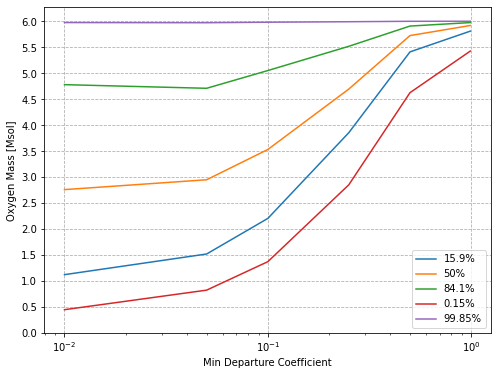

In [25]:
def plot_quantiles(percentile_key, idx, label, div_by=1):
    deps = []
    vals = []
    for key in data.keys():
        deps.append(key[1])
        p = data[key][percentile_key]
        vals.append(p[idx])
    print(deps)
    t = table.Table([deps, vals], names=('deps', 'vals'))
    t.sort('deps')
    plt.plot(t['deps'], t['vals']/div_by, label=label)

plt.figure(figsize=(8,6))
plot_quantiles('mass_p', 0, label='15.9%')
plot_quantiles('mass_p', 1, label='50%')
plot_quantiles('mass_p', 2, label='84.1%')
plot_quantiles('mass_p', 3, label='0.15%')
plot_quantiles('mass_p', 4, label='99.85%')
plt.xlabel('Min Departure Coefficient')
plt.ylabel('Oxygen Mass [Msol]')
plt.xscale('log')
plt.legend();
plt.grid(ls='--')
plt.yticks(np.arange(0, 6.5, 0.5));

[0.01, 0.05, 0.1, 0.25, 0.5, 0.99]
[0.01, 0.05, 0.1, 0.25, 0.5, 0.99]
[0.01, 0.05, 0.1, 0.25, 0.5, 0.99]
[0.01, 0.05, 0.1, 0.25, 0.5, 0.99]
[0.01, 0.05, 0.1, 0.25, 0.5, 0.99]


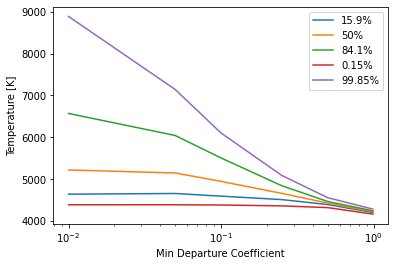

In [9]:
plot_quantiles('temp_p', 0, label='15.9%')
plot_quantiles('temp_p', 1, label='50%')
plot_quantiles('temp_p', 2, label='84.1%')
plot_quantiles('temp_p', 3, label='0.15%')
plot_quantiles('temp_p', 4, label='99.85%')
plt.xlabel('Min Departure Coefficient')
plt.ylabel('Temperature [K]')
plt.xscale('log')
plt.legend();

[0.01, 0.05, 0.1, 0.25, 0.5, 0.99]
[0.01, 0.05, 0.1, 0.25, 0.5, 0.99]
[0.01, 0.05, 0.1, 0.25, 0.5, 0.99]


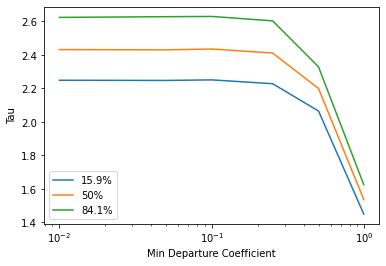

In [10]:
plot_quantiles('tau_p', 0, label='15.9%')
plot_quantiles('tau_p', 1, label='50%')
plot_quantiles('tau_p', 2, label='84.1%')
plt.xlabel('Min Departure Coefficient')
plt.ylabel('Tau')
plt.xscale('log')
plt.legend();

[0.01, 0.05, 0.1, 0.25, 0.5, 0.99]
[0.01, 0.05, 0.1, 0.25, 0.5, 0.99]
[0.01, 0.05, 0.1, 0.25, 0.5, 0.99]
[0.01, 0.05, 0.1, 0.25, 0.5, 0.99]
[0.01, 0.05, 0.1, 0.25, 0.5, 0.99]
[0.01, 0.05, 0.1, 0.25, 0.5, 0.99]
[0.01, 0.05, 0.1, 0.25, 0.5, 0.99]
[0.01, 0.05, 0.1, 0.25, 0.5, 0.99]
[0.01, 0.05, 0.1, 0.25, 0.5, 0.99]


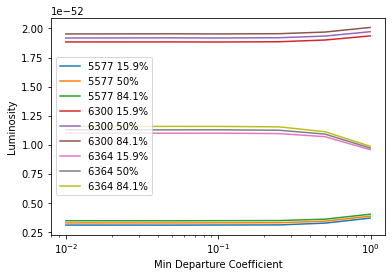

In [11]:
for line in [5577, 6300, 6364]:
    plot_quantiles('l%d_p' % line, 0, label='%d 15.9%%' % line, div_by=1e38)
    plot_quantiles('l%d_p' % line, 1, label='%d 50%%' % line, div_by=1e38)
    plot_quantiles('l%d_p' % line, 2, label='%d 84.1%%' % line, div_by=1e38)
plt.ylabel('Luminosity')
plt.xlabel('Min Departure Coefficient')
plt.xscale('log')
plt.legend();

[0.01, 0.05, 0.1, 0.25, 0.5, 0.99]
[0.01, 0.05, 0.1, 0.25, 0.5, 0.99]
[0.01, 0.05, 0.1, 0.25, 0.5, 0.99]
[0.01, 0.05, 0.1, 0.25, 0.5, 0.99]


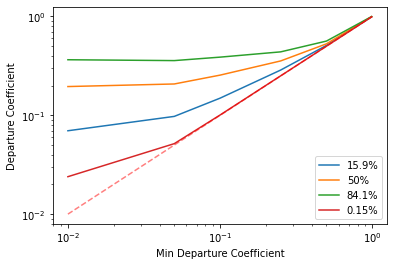

In [16]:
plot_quantiles('dep_p', 0, label='15.9%')
plot_quantiles('dep_p', 1, label='50%')
plot_quantiles('dep_p', 2, label='84.1%')
plot_quantiles('dep_p', 3, label='0.15%')
plt.xlabel('Min Departure Coefficient')
plt.ylabel('Departure Coefficient')
plt.xscale('log')
plt.yscale('log')
plt.legend();
x = np.logspace(-2,0)
plt.plot(x, x, ls='--', alpha=0.5, color='red')

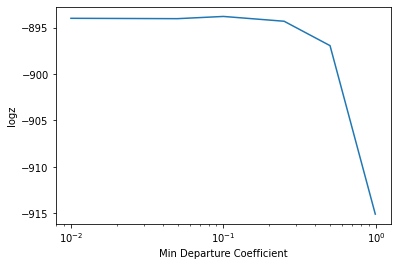

In [13]:
def plot_logz():
    deps = []
    vals = []
    for key in data.keys():
        deps.append(key[1])
        vals.append(data[key]['results'].logz[-1])
    t = table.Table([deps, vals], names=('deps', 'vals'))
    t.sort('deps')
    plt.plot(t['deps'], t['vals'])

plot_logz()
plt.ylabel('logz')
plt.xlabel('Min Departure Coefficient')
plt.xscale('log')

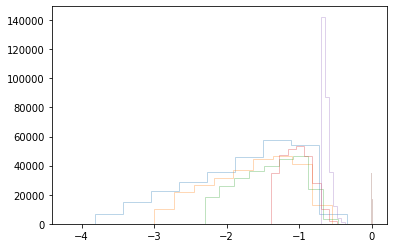

In [14]:
for key in data.keys():
    label = '%.1e' % key[1]
    plt.hist(np.log(data[key]['samples'][:,11]), label=label, histtype='step', alpha=0.3)
        

In [16]:
# add more samples!
def update_samples(key):
    results = data[key]['sampler'].results
    samples, weights = results.samples, np.exp(results.logwt - results.logz[-1])
    new_samples = dyfunc.resample_equal(samples, weights)
    data[key]['samples'] = new_samples

for key in data.keys():
    update_samples(key)

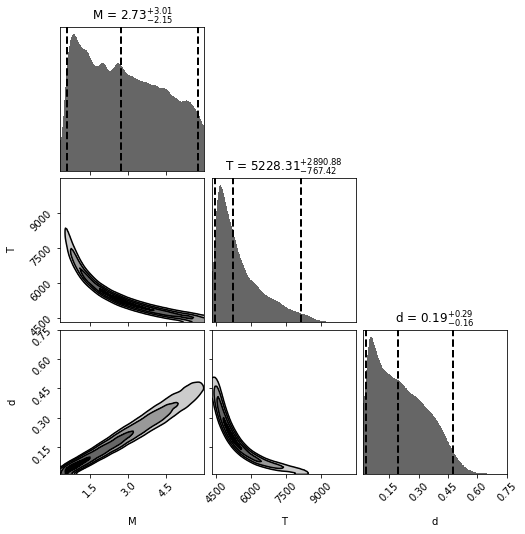

In [26]:
key = list(data.keys())[0]
results = data[key]['sampler'].results
dyplot.cornerplot(results, dims=[0, 1,11], labels=['M', 'T', 'd'], show_titles=True);